In [14]:
%matplotlib inline

# Notebook zum Rumspielen #

## Verteilung der z-scores plotten

In [25]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

import helper

Deutsches Beispielkorpus einlesen:

In [16]:
terms, documents, matrix = helper.read_csv("/home/ccl/tsproisl/Dokumente/Arbeit/kallimachos/authorship/data/delta_corpus_DE.csv")
authors = helper.extract_authors_from_document_names(documents)

Wir entfernen alle Terme, die in weniger als zwei Dokumenten vorkommen und wandeln die absoluten Häufigkeiten in relative um:

In [17]:
matrix, terms = helper.transform_to_relative_frequency(matrix, terms, min_df=2)

Wir wollen nur die 1000 häufigsten Terme und wir wollen die Merkmale standardisieren (z-scores):

In [18]:
matrix, terms = helper.select_most_frequent(matrix, terms, 1000)
z_scores = scipy.stats.zscore(matrix, axis=0, ddof=1)

Wir plotten ein Histogramm der z-scores und legen die entsprechende Normalverteilung darüber:

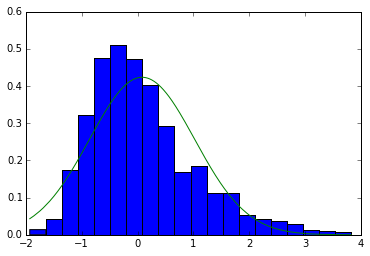

In [44]:
sorted_z_scores = np.sort(z_scores[0])
fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
plt.hist(z_scores[0], bins=20, normed=True)
plt.plot(sorted_z_scores, fit)
plt.show()